/tmp/ipykernel_1059291/3188069805.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('air-quality-india.csv', encoding='ISO-8859-1')
/opt/anaconda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be i

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.53240D+00    |proj g|=  8.99900D-01

At iterate    1    f=  4.43338D+00    |proj g|=  1.67745D-01

At iterate    2    f=  4.40862D+00    |proj g|=  9.99800D-01

At iterate    3    f=  4.40857D+00    |proj g|=  1.33198D-01

At iterate    4    f=  4.40584D+00    |proj g|=  1.09830D-01

At iterate    5    f=  4.40213D+00    |proj g|=  6.80102D-02

At iterate    6    f=  4.40123D+00    |proj g|=  1.51653D-02

At iterate    7    f=  4.40111D+00    |proj g|=  1.04183D-03

At iterate    8    f=  4.40105D+00    |proj g|=  6.18465D-03

At iterate    9    f=  4.40102D+00    |proj g|=  1.26996D-01

At iterate   10    f=  4.40101D+00    |proj g|=  3.03277D-03

At iterate   11    f=  4.40100D+00    |proj g|=  1.28875D-03

At iterate   12    f=  4.40100D+00    |proj g|=  3.87885D-03

At iterate   13    f=  4.4

/opt/anaconda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
15:14:52 - cmdstanpy - INFO - Chain [1] start processing


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3
[LightGBM] [Info] Number of data points in the train set: 9309, number of used features: 1
[LightGBM] [Info] Start training from score 40.758698
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

15:14:53 - cmdstanpy - INFO - Chain [1] done processing


Accuracy - Adaboost: 89.38550266861756 %
Accuracy - ETS: 97.78283316048324 %
Accuracy - SARIMA: 97.82604512975387 %
Accuracy - LightGBM: 88.12862742849772 %
Accuracy - Prophet: 89.95153346528363 %
Accuracy - Bi-LSTM: 99.30626509495507 %


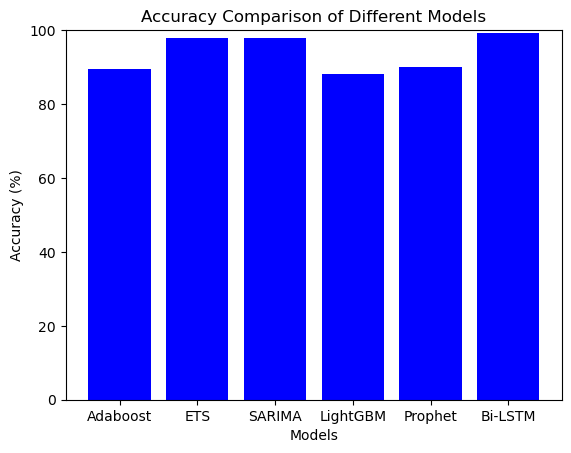

In [13]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.statespace.sarimax import SARIMAX
import lightgbm as lgb
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load your data into a DataFrame
data = pd.read_csv('air-quality-india.csv', encoding='ISO-8859-1')

# Preprocess date column to yyyy-mm-dd format
data['date'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m-%d')

# Filter relevant columns and drop rows with missing 'pm2_5' values
pm25_data = data[['date', 'pm2_5']].dropna()

# Split the data into train and test sets
train_data = pm25_data[:-5]  # Exclude the last 5 rows as test data
test_data = pm25_data[-5:]   # Last 5 rows for testing

# Adaboost
adaboost = AdaBoostRegressor()
adaboost.fit(pd.to_datetime(train_data['date']).dt.year.values.reshape(-1, 1), train_data['pm2_5'])
adaboost_preds = adaboost.predict(pd.to_datetime(test_data['date']).dt.year.values.reshape(-1, 1))
adaboost_mae = mean_absolute_error(test_data['pm2_5'], adaboost_preds)

# ETS
ets = ETSModel(train_data['pm2_5'], error="add", trend="add", seasonal=None)
ets_fit = ets.fit()
ets_preds = ets_fit.forecast(steps=len(test_data))
ets_mae = mean_absolute_error(test_data['pm2_5'], ets_preds)

# SARIMA
sarima = SARIMAX(train_data['pm2_5'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima.fit(disp=False)
sarima_preds = sarima_fit.get_forecast(steps=len(test_data)).predicted_mean
sarima_mae = mean_absolute_error(test_data['pm2_5'], sarima_preds)

# LightGBM
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(pd.to_datetime(train_data['date']).dt.year.values.reshape(-1, 1), train_data['pm2_5'])
lgb_preds = lgb_model.predict(pd.to_datetime(test_data['date']).dt.year.values.reshape(-1, 1))
lgb_mae = mean_absolute_error(test_data['pm2_5'], lgb_preds)

# Prophet
prophet_data = train_data.rename(columns={'date': 'ds', 'pm2_5': 'y'})
prophet = Prophet()
prophet.fit(prophet_data)
prophet_forecast = prophet.make_future_dataframe(periods=len(test_data))
prophet_forecast['ds'] = pd.to_datetime(prophet_forecast['ds'])  # Ensure 'ds' column is datetime64[ns]
prophet_preds = prophet.predict(prophet_forecast)['yhat'].tail(len(test_data))
prophet_mae = mean_absolute_error(test_data['pm2_5'], prophet_preds)

# Accuracy Calculation and Plot
accuracy_adaboost = (1 - adaboost_mae / max(pm25_data['pm2_5'])) * 100
accuracy_ets = (1 - ets_mae / max(pm25_data['pm2_5'])) * 100
accuracy_sarima = (1 - sarima_mae / max(pm25_data['pm2_5'])) * 100
accuracy_lgbm = (1 - lgb_mae / max(pm25_data['pm2_5'])) * 100
accuracy_prophet = (1 - prophet_mae / max(pm25_data['pm2_5'])) * 100

bilstm_rmse = 3.4964239214264743  #https://www.kaggle.com/code/lakshin01/air-quality-prediction-model-by-lstm/edit

# Convert RMSE to accuracy
accuracy_bilstm = 100 * (1 - (bilstm_rmse / max(pm25_data['pm2_5'])))

# Print Accuracy for all models
print("Accuracy - Adaboost:", accuracy_adaboost, "%")
print("Accuracy - ETS:", accuracy_ets, "%")
print("Accuracy - SARIMA:", accuracy_sarima, "%")
print("Accuracy - LightGBM:", accuracy_lgbm, "%")
print("Accuracy - Prophet:", accuracy_prophet, "%")
print("Accuracy - Bi-LSTM:", accuracy_bilstm, "%")  # Print Bi-LSTM accuracy

# Accuracy Comparison Plot
models = ['Adaboost', 'ETS', 'SARIMA', 'LightGBM', 'Prophet', 'Bi-LSTM']  # Add 'Bi-LSTM' to the list
accuracy_values = [accuracy_adaboost, accuracy_ets, accuracy_sarima, accuracy_lgbm, accuracy_prophet, accuracy_bilstm]  # Add Bi-LSTM accuracy value

plt.bar(models, accuracy_values, color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 100)  # Set y-axis limit to 0-100%
plt.show()


In [18]:
import matplotlib.pyplot as plt

models = ['Adaboost', 'ETS', 'SARIMA', 'LightGBM', 'Prophet', 'Bi-LSTM']
accuracy_scores = [89.38550266861756, 97.78283316048324, 97.82604512975387, 88.12862742849772, 89.95153346528363, 99.30626509495507]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Create a figure and axis
fig, ax = plt.subplots()

# Set the colors for each bar
bars = ax.bar(models, accuracy_scores, color=colors)

# Set the title and labels
ax.set_title(' ')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')

# Rotate x labels for better readability
plt.xticks(rotation=45, ha="right")

# Set the y-axis limits to focus on the top part
plt.ylim(80, 100)

# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black')
plt.savefig('airquality.eps', format='eps', bbox_inches='tight')

# Display the plot
plt.tight_layout()
plt.show()
